In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print(df.head())


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


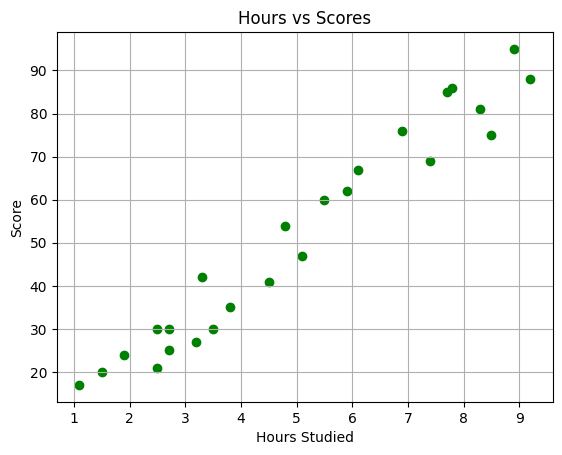

In [2]:
plt.scatter(df['Hours'], df['Scores'], color='green')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [ ]:
X = df[['Hours']]  # 2D array
y = df['Scores']   # 1D array 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1) 


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train) 

y_lin_pred = lin_model.predict(X_test) 

print(f"Linear Model R2 Score: {r2_score(y_test, y_lin_pred):.2f}") 


Linear Model R2 Score: 0.84


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression() 
poly_model.fit(X_train_poly, y_train)  

y_poly_pred = poly_model.predict(X_test_poly) 

print(f"Polynomial Model R2 Score: {r2_score(y_test, y_poly_pred):.2f}") 


Polynomial Model R2 Score: 0.84


c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


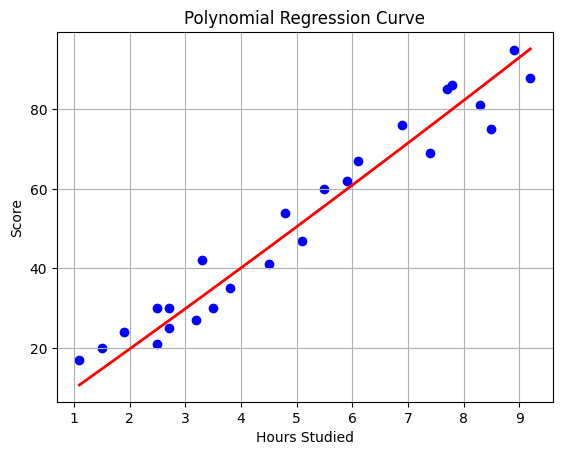

In [7]:
# Generate smooth curve
X_range = np.linspace(min(X.values), max(X.values), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = poly_model.predict(X_range_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_range, y_range_pred, color='red', linewidth=2)
plt.title('Polynomial Regression Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [8]:
hours = [[9.25]]
hours_poly = poly.transform(hours)
predicted_score = poly_model.predict(hours_poly)
print(f"Predicted score for 9.25 hours = {predicted_score[0]:.2f}")


Predicted score for 9.25 hours = 95.74


c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
